In [3]:
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

to_rgb = lambda image: cv.cvtColor(image, cv.COLOR_BGR2RGB)
to_gray = lambda image: cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [1]:
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from os import path

RESIZE_FACTOR = 75
IMAGES_COUNT = 15

to_rgb = lambda image: cv.cvtColor(image, cv.COLOR_BGR2RGB)
to_gray = lambda image: cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
def scale(img, scale_percent):
    if scale_percent == 100:
        return img
    
    factor = scale_percent / 100
    return cv.resize(img, (int(img.shape[1] * factor), int(img.shape[0] * factor)), interpolation = cv.INTER_AREA)

data_path = '../data'
inputs_path = path.join(data_path, 'board+dominoes')

template_board = scale(cv.imread(f'{inputs_path}/board_inner_template.png', cv.IMREAD_COLOR), RESIZE_FACTOR) 

filenames = [path.join(inputs_path, str(i).rjust(2, '0')) + '.jpg' for i in range(1,IMAGES_COUNT+1)]
images = [scale(cv.imread(filename, cv.IMREAD_COLOR), RESIZE_FACTOR) for filename in filenames]

In [2]:
img1 = cv.imread('../data/board+dominoes/board_inner_template.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('../data/board+dominoes/10.jpg',cv.IMREAD_GRAYSCALE) # trainImage

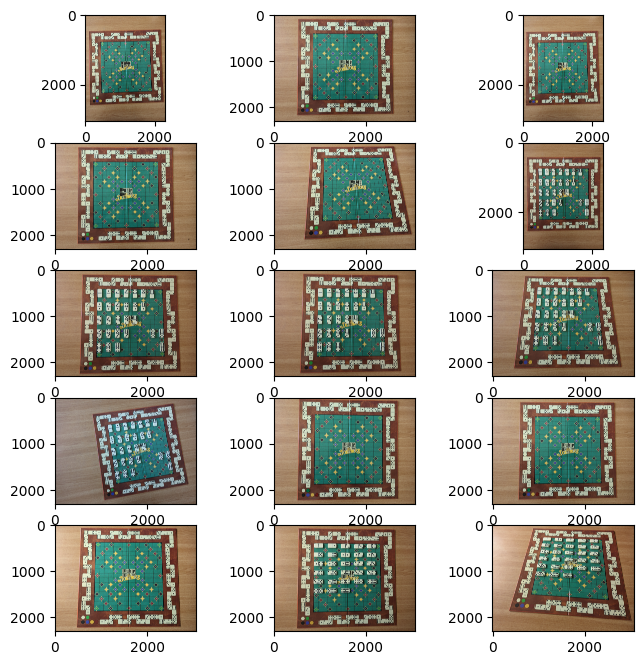

In [2]:
# https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly
def show_images(images):
    fig = plt.figure(figsize=(8, 8))
    columns = 3
    rows = len(images) // columns + len(images) % columns
    for i, image in zip(range(1, columns*rows +1), images):
        fig.add_subplot(rows, columns, i)
        plt.imshow(to_rgb(image))
    plt.show()
    
show_images(images)

In [3]:
# https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
def scale(img, scale_percent):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    return cv.resize(img, dim, interpolation = cv.INTER_AREA)

In [1]:
extracted_images = [extract(image, template_board, 1000, 0.15)[0] for image in images]

NameError: name 'images' is not defined

In [4]:
img1 = scale(img1, 50)
img2 = scale(img2, 50)

In [ ]:
show_images(extracted_images)

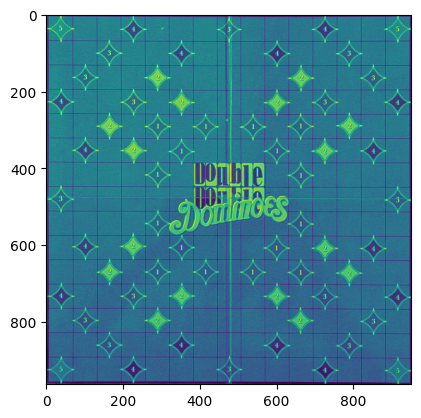

(<matplotlib.image.AxesImage at 0x7f233fb2a650>, None)

In [5]:
plt.imshow(img1),plt.show()

In [9]:
cv.imwrite('../data/outputs/sift.jpg', algn)

True

In [ ]:
# https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html
def extract_sift(train_image, query_image):
    img1, img2 = query_image, train_image
    
    img1 = to_gray(img1)
    img2 = to_gray(img2)
    
    sift = cv.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i]=[1,0]
    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = (255,0,0),
                       matchesMask = matchesMask,
                       flags = cv.DrawMatchesFlags_DEFAULT)
    imMatches = cv.drawMatchesKnn(query_image,kp1,train_image,kp2,matches,None,**draw_params)
    
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points2[i, :] = kp1[match[0].queryIdx].pt
        points1[i, :] = kp2[match[0].trainIdx].pt

    # Find homography
    h, mask = cv.findHomography(points1, points2, cv.RANSAC)

    # Use homography
    height, width = img1.shape
    algn = cv.warpPerspective(train_image, h, (width, height))

    return algn, imMatches

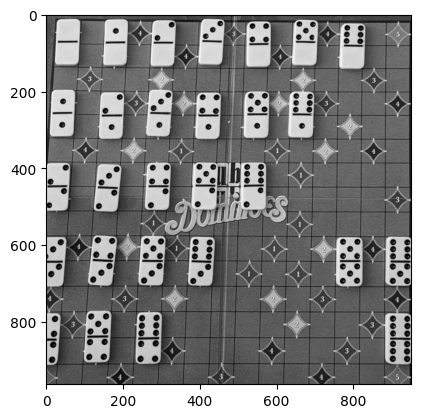

In [8]:
plt.imshow(algn, cmap='gray')

In [ ]:
extracted_images = [extract_sift(image, template_board)[0] for image in images]

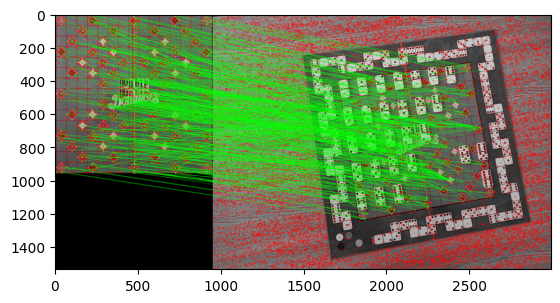

In [7]:
algn, h,matches = align_sift(img1, img2)

plt.imshow(matches, cmap='gray')

In [ ]:
show_images(extracted_images)

NameError: name 'cv' is not defined